# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Ciência de Dados</b></center></font>
  
<font size="3"><center>Prof. Renato M. Silva</center></font>
<br/>

# <center>Exercício - Perceptron</center>

## Introdução

Você foi contratado por uma grande empresa de cosméticos para desenvolver um método para classificar diferentes espécies de uma flor. Essencialmente, a empresa está interessada em separar automaticamente espécies de uma flor chamada Iris. Esse tipo de flor é composta por três espécies: **Setosa**, **Virginica** e **Versicolour**, apresentadas na Figura 1. As duas primeiras (Setosa e Virginica) possuem propriedades aromáticas de interesse da empresa, já a última (Versicolour) não pode ser utilizada.

Devido à forte semelhança visual entre elas, ocorreu a ideia de que, talvez, seja possível detectar cada espécie pelas medidas de comprimento e largura das pétalas. Com base nessa informação, a empresa criou duas base de dados pré-classificadas (Setosa + Versicolour e Virginica + Versicolour) com as respectivas medidas das pétalas das flores. A sua função é implementar o método Perceptron para determinar a espécie de uma Iris a partir dos dados das pétalas.

<br>
<br>




## Parte 1: Visualização dos dados

Muitas vezes, a visualização dos dados auxilia na interpretação dos mesmos
e como eles estão distribuídos. Nesta etapa, você precisa completar a
função de normalização dos atributos ( <tt>normalizacao()</tt> ).

Primeiro, vamos carregar os dados do arquivo.

In [2]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = 'dados'

import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import os # importa a biblioteca para tarefas relacionadas ao sistema operacional

# Importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv(os.path.join(FILES_DIRECTORY, 'dados.csv'), sep=',', index_col=None)

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


Agora, vamos dar uma olhada nas cinco primeiras amostras da base de dados.

In [3]:
# vamos usar a função display para imprimir o dataframe.
# Obs: poderíamos ter usado a função print: print(df_dataset.head(n=5))
display(df_dataset.head(n=5))

,largura_petala,comprimento_petala,classe
0,4.9,3.1,0
1,4.4,3.0,0
2,5.7,4.4,0
3,5.5,4.2,0
4,4.9,3.1,0


Agora, vamos guardar os dados dentro de uma matriz e as classes dentro de um vetor. As cinco primeiras linhas da matriz de dados e do vetor de classes serão exibidos.

In [5]:
# Pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_dataset.iloc[:, 0:-1].values

# Pega os valores da ultima coluna e guarda em um vetor Y
Y = df_dataset.iloc[:, -1].values

# Imprime as 5 primeiras linhas da matriz X
display('X:', X[0:5,:])

# Imprime os 5 primeiros valores de Y
print('Y:', Y[0:5])

'X:'

array([[4.9, 3.1],
       [4.4, 3. ],
       [5.7, 4.4],
       [5.5, 4.2],
       [4.9, 3.1]])

Y: [0 0 0 0 0]


Agora, vamos criar uma função para plotar os dados.

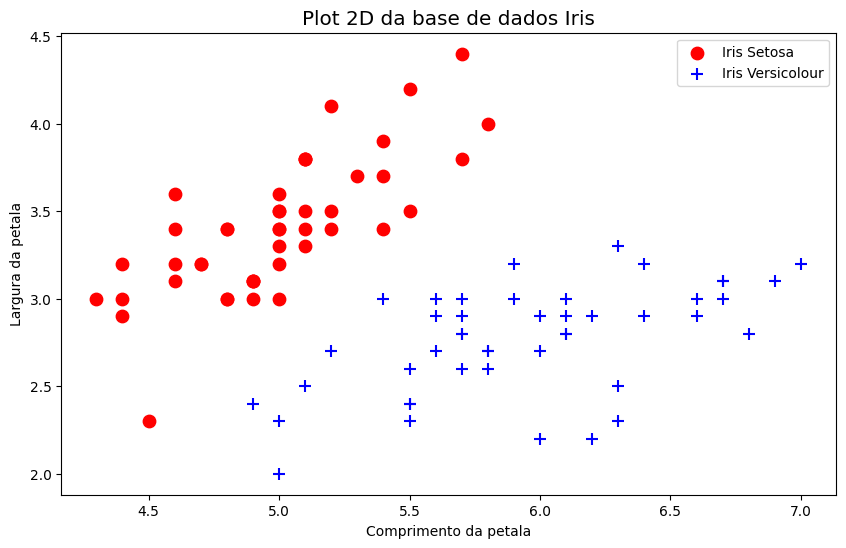

In [6]:
# Importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# Criando a função para plotar os dados
def visualizarDados(X,Y, nome_classe0, nome_classe1):
    """
    Função usada para plotar os dados
    """

    # definindo o tamanho da figura
    plt.figure(figsize=(10,6))

    # plota os dados da classe 0
    plt.scatter( X[Y==0,0], X[Y==0,1], label=nome_classe0, marker='o', color='red', s=80)

    # plota os dados da classe 1
    plt.scatter( X[Y==1,0], X[Y==1,1], label=nome_classe1, marker='+', color='blue', s=80)

    # define os nomes dos eixos x e y
    plt.xlabel(r'Comprimento da petala',fontsize='medium')
    plt.ylabel(r'Largura da petala',fontsize='medium')

    # plota a legenda
    plt.legend()

    # define o título do gráfico
    plt.title('Plot 2D da base de dados Iris', fontsize='x-large')

# Chamando a função que plota os dados
visualizarDados(X,Y, 'Iris Setosa', 'Iris Versicolour')

# exibe o grafico
plt.show()

## Implementação da método Perceptron

Antes de implementar o Perceptron, vamos separar os dados em treino (80%) e teste (20%).

In [7]:
# define a porcentagem de treinamento
porcTrain = 0.8

# vamos usar uma semente para que sempre separe igualmente
randomSeed = 20

# variáveis que deverão guardar as classes de treino e teste
Y_train = None
Y_test = None

########################## COMPLETE O CÓDIGO AQUI  ########################
#
# (1) separe os dados em treino e teste usando a função StratifiedShuffleSplit da
#     biblioteca scikit learn
# (2) na inicializacao do modelo, configure o parâmetro random state com a semente informada
#     no código acima
# (3) use o método split da função StratifiedShuffleSplit para obter os índices de treino e teste.
#     Esse método retorna um generator. Para receber os valores, você pode usar um laço de
#     repetição ou usar a função next
#

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, train_size=porcTrain, random_state=0)

train_index, test_index = next(sss.split(X,Y))
X_train = X[train_index, :]
X_test = X[test_index, :]

Y_train = Y[train_index]
Y_test = Y[test_index]



##########################################################################

print('Qtd. dados de treinamento: %d (%1.2f%%)' %(X_train.shape[0], (X_train.shape[0]/X.shape[0])*100) )
print('Qtd. de dados de teste: %d (%1.2f%%)' %(X_test.shape[0], (X_test.shape[0]/X.shape[0])*100) )

Qtd. dados de treinamento: 72 (80.00%)
Qtd. de dados de teste: 18 (20.00%)


Vamos treinar um modelo de classificação usando o método **perceptron**. Para isso, iremos empregar a biblioteca **scikit-learn**.

In [13]:
# define a porcentagem de treinamento
porcTrain = 0.8

# vamos usar uma semente para que sempre separe igualmente
randomSeed = 20

# embaralha os indices
permutedIndexes = np.random.RandomState(randomSeed).permutation( X.shape[0] )

# embaralha os dados com base nos indices embaralhados
X_shuffled, Y_shuffled = X[permutedIndexes,:], Y[permutedIndexes]

# separa em treino e teste
qtdTreino = int(X_shuffled.shape[0]*0.8)
X_train, Y_train = X_shuffled[0:qtdTreino,:], Y_shuffled[0:qtdTreino]
X_test, Y_test = X_shuffled[qtdTreino:,:], Y_shuffled[qtdTreino:]

print('Qtd. dados de treinamento: %d (%1.2f%%)' %(X_train.shape[0], (X_train.shape[0]/X.shape[0])*100) )
print('Qtd. de dados de teste: %d (%1.2f%%)' %(X_test.shape[0], (X_test.shape[0]/X.shape[0])*100) )

print(X[0:5,:])

Qtd. dados de treinamento: 72 (80.00%)
Qtd. de dados de teste: 18 (20.00%)
[[4.9 3.1]
 [4.4 3. ]
 [5.7 4.4]
 [5.5 4.2]
 [4.9 3.1]]


In [14]:
Y_train[ Y_train==0 ] = -1
Y_test[ Y_test==0 ] = -1

print("Classes Y_train: ", np.unique(Y_train) )
print("Classes Y_test: ", np.unique(Y_test) )

Classes Y_train:  [-1  1]
Classes Y_test:  [-1  1]


In [15]:
# variável que deverá recer o modelo
model = None

########################## COMPLETE O CÓDIGO AQUI  ########################
#
# (1) importe o método Percetron da biblioteca Scikit-learn
# (2) inicialize o parâmetro referente à taxa de aprendizado com valor igual a 0.5 (eta0)
# (3) inicialize o método com o parâmetro referente ao máximo de iterações igual a 500 (max_iter)
# (4) inicialize o parâmetro que contém o critério de parada com valor igual a 0.0002 (tol)
# (5) inicialize o método com um valor para o parâmetro random state
# (6) use o método fit para treinar o modelo

from sklearn.linear_model import Perceptron

model = Perceptron(eta0=0.001, max_iter=1000, tol = 0.0, random_state= 0)
model.fit(X = X_train, y = Y_train)


##########################################################################

print('Informações do modelo: ')
print(model)

print('\nPesos encontrados: ')
print(model.coef_) # returns a matrix of weights (coefficients)

Informações do modelo: 
Perceptron(eta0=0.001, tol=0.0)

Pesos encontrados: 
[[ 0.0251 -0.04  ]]


Agora, vamos testar os pesos aprendidos pelo Perceptron na classificação dos dados de teste.

In [ ]:
# inicializa o vetor com as predições
Y_pred = np.zeros( len(Y_test) )

########################## COMPLETE O CÓDIGO AQUI  ########################
#
# (1) use o método predict para fazer as predições no conjunto de teste
#

Y_pred = model.predict(X_test)


##########################################################################


print("Cinco primeiras classes preditas")
print(Y_pred[0:5])

Cinco primeiras classes preditas
[0 1 1 0 0]


Vamos criar uma funcao para plotar a superfície de decisão criada pelo Perceptron.

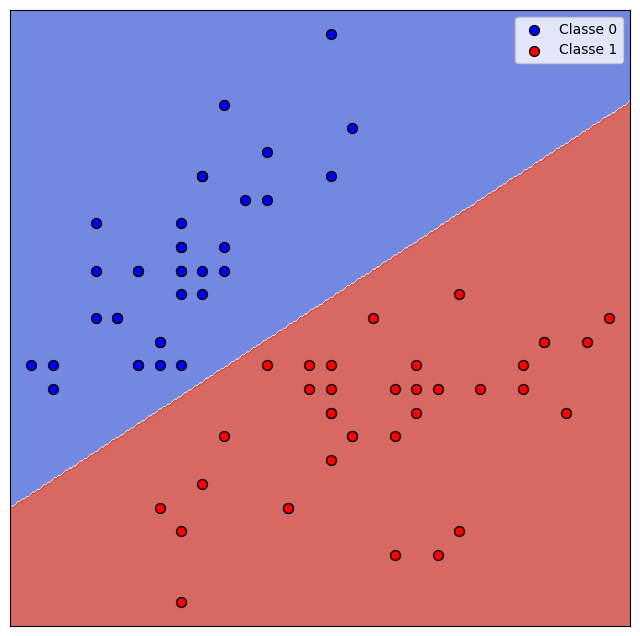

In [ ]:
#função para plotar o limite de decisão
def plota_limite_decisao(model, X, Y, ax):

    x = X[:, 0]
    y = X[:, 1]

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    ax.set_xlim(x.min()-0.1, x.max()+0.1)
    ax.set_ylim(y.min()-0.1, y.max()+0.1)
    ax.set_xticks(())
    ax.set_yticks(())

    #plota os dados da classe 0
    plt.scatter( X[Y==0,0], X[Y==0,1], label='Classe 0', color='blue', s=50, edgecolors='k')

    #plota os dados da classe 1
    plt.scatter( X[Y==1,0], X[Y==1,1], label='Classe 1', color='red', s=50, edgecolors='k')

    #insere a legenda
    plt.legend()


# define o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 8))

# plota o limite de decisão
plota_limite_decisao(model, X_train, Y_train, ax)
plt.show()


Calcule o desempenho do método de classificação.

In [ ]:
# variável que deverá receber os resultados
resultados = None

########################## COMPLETE O CÓDIGO AQUI  ########################
#
# (1) Use o método classification_report da biblioteca scikitlearn para
#     calcular o desempenho do classificador

from sklearn.metrics import classification_report

resultados = classification_report(Y_test, Y_pred)


##########################################################################

print(resultados)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18

